# Data science demo

In [8]:
import pandas as pd
import sklearn as sl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## load dataset to see what we're dealing with

In [2]:
dataset = pd.read_csv('flats.csv')
dataset.head()

,rooms,size,price,link
0,3,122,3250,https://www.idealista.com/inmueble/108093988/
1,4,174,2435,https://www.idealista.com/inmueble/109615637/
2,3,78,3300,https://www.idealista.com/inmueble/107769022/
3,3,100,2500,https://www.idealista.com/inmueble/109778847/
4,1,41,1390,https://www.idealista.com/inmueble/103931972/


See how flat prices are distributed vs. size

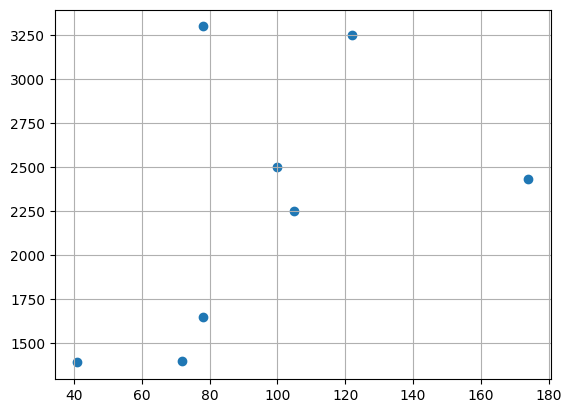

In [7]:
plt.scatter(dataset['size'], dataset['price'])
plt.grid(True)

And see price vs. rooms:

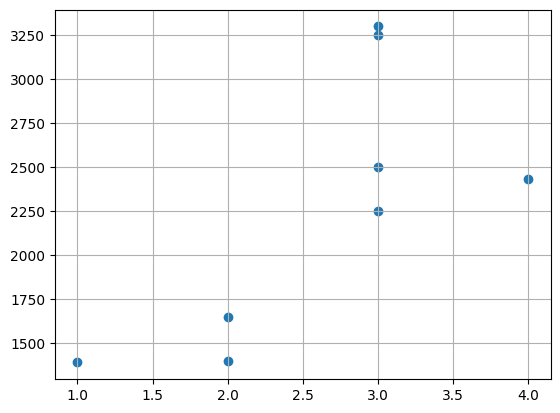

In [6]:
plt.scatter(dataset['rooms'], dataset['price'])
plt.grid(True)

## Now, let's create a model and fit it to the data we have.

In [10]:
# First, we decide which features we want to use for prediction
X = dataset[['size', 'rooms']]
y = dataset['price']

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## See what line the model fits:

In [13]:
coefficients = model.coef_
intercept = model.intercept_

for name, coef in zip(X.columns, coefficients):
    print(f'Coefficient for {name}: {coef}')
print(f'Intercept: {intercept}')

Coefficient for size: -16.33560430860259
Coefficient for rooms: 1223.8409692272426
Intercept: 631.5943704814874


In [15]:
total_formula = 'price = ' + ' + '.join([f'({coef} * {name})' for name, coef in zip(X.columns, coefficients)]) + f' + ({intercept})'
print('Regression formula:', total_formula)

Regression formula: price = (-16.33560430860259 * size) + (1223.8409692272426 * rooms) + (631.5943704814874)


## Visualize the line:

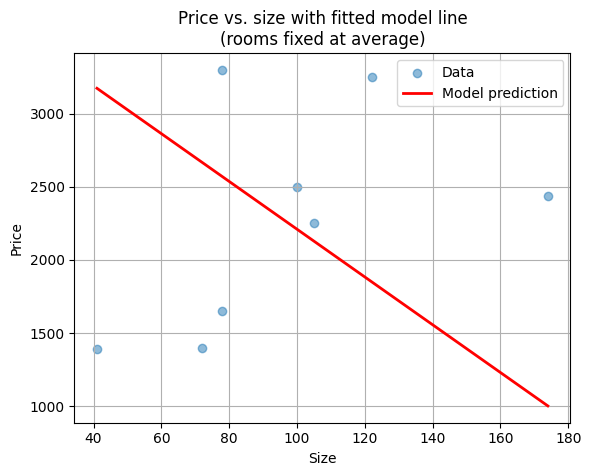

In [17]:
import numpy as np
plt.scatter(dataset["size"], dataset["price"], alpha=0.5, label="Data")

# Line: model prediction as size changes, rooms fixed at mean
size_grid = np.linspace(dataset["size"].min(), dataset["size"].max(), 100)
rooms_mean = dataset["rooms"].mean()

X_grid = pd.DataFrame({
    "size": size_grid,
    "rooms": rooms_mean
})

y_pred_grid = model.predict(X_grid)

plt.plot(size_grid, y_pred_grid, color="red", linewidth=2, label="Model prediction")

plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Price vs. size with fitted model line\n(rooms fixed at average)")
plt.legend()
plt.grid(True)
plt.show()

## Making new predictions

In [18]:
# Suppose we want to see the predicted price for a flat of size 70 and 3 rooms
flat_size = 70
flat_rooms = 3
predicted_price = model.predict([[flat_size, flat_rooms]])
print(f'Predicted price for a flat of size {flat_size} and {flat_rooms} rooms: {predicted_price[0]}')


Predicted price for a flat of size 70 and 3 rooms: 3159.6249765610337


/Users/vladimir/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
